In [ ]:
# Step 1: Upload your file from your computer
from google.colab import files
uploaded = files.upload()



Saving House Price Prediction Dataset.csv to House Price Prediction Dataset.csv


In [ ]:
# Step 2: Load the uploaded file
import pandas as pd

df = pd.read_csv("House Price Prediction Dataset.csv")
df.head()  # Show first 5 rows


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
  import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for better-looking graphs
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


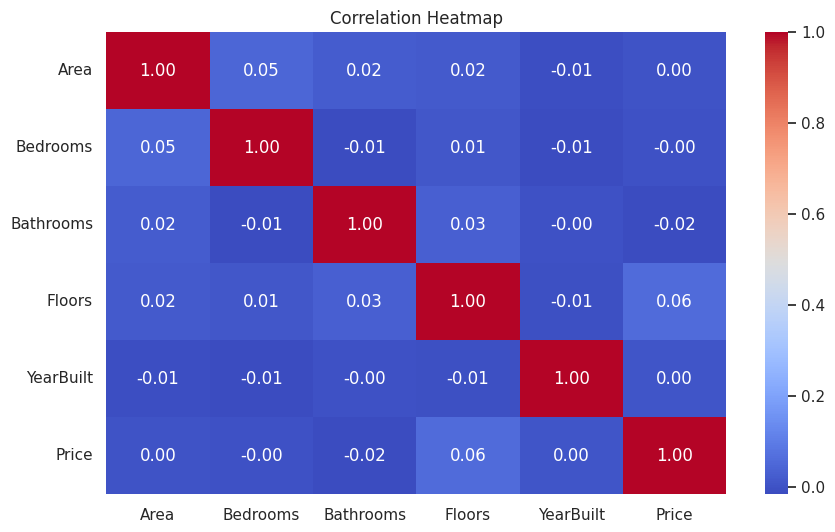

In [ ]:
numerical_cols = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt", "Price"]
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


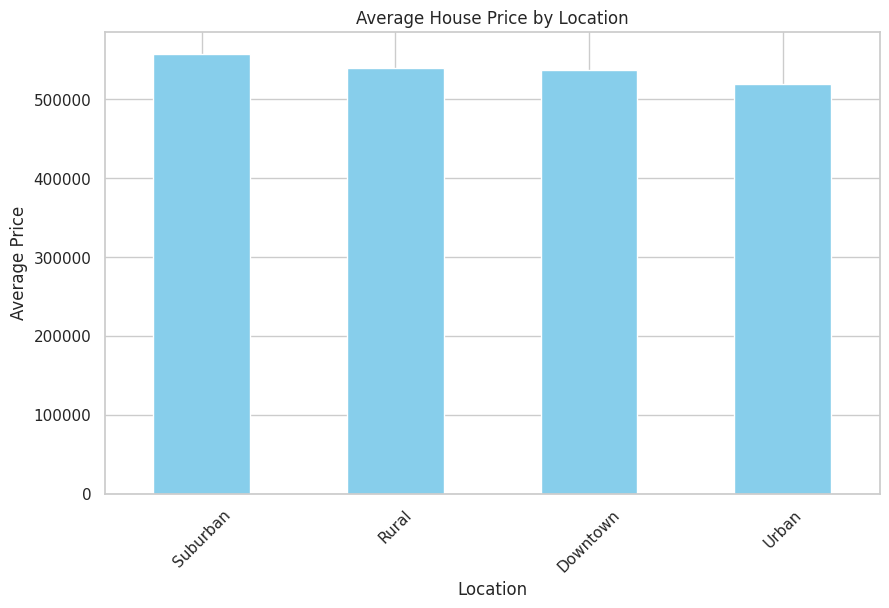

In [ ]:
avg_price_by_location = df.groupby("Location")["Price"].mean().sort_values(ascending=False)

avg_price_by_location.plot(kind="bar", color="skyblue")
plt.title("Average House Price by Location")
plt.ylabel("Average Price")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-9-3018256790.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Bedrooms", y="Price", data=df, palette="Set3")


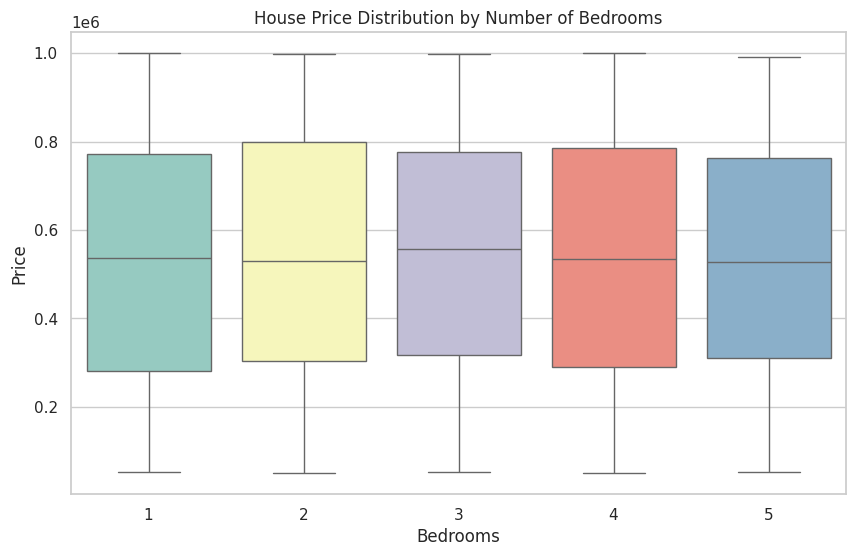

In [ ]:
sns.boxplot(x="Bedrooms", y="Price", data=df, palette="Set3")
plt.title("House Price Distribution by Number of Bedrooms")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Define features and target
X = df.drop(columns=["Id", "Price"])
y = df["Price"]

# Categorical & numeric columns
categorical_cols = ["Location", "Condition", "Garage"]
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
], remainder="passthrough")

# Pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🏁 Model Performance:")
print(f"RMSE: ₹{rmse:,.0f}")
print(f"R² Score: {r2:.3f}")


🏁 Model Performance:
RMSE: ₹292,410
R² Score: -0.099


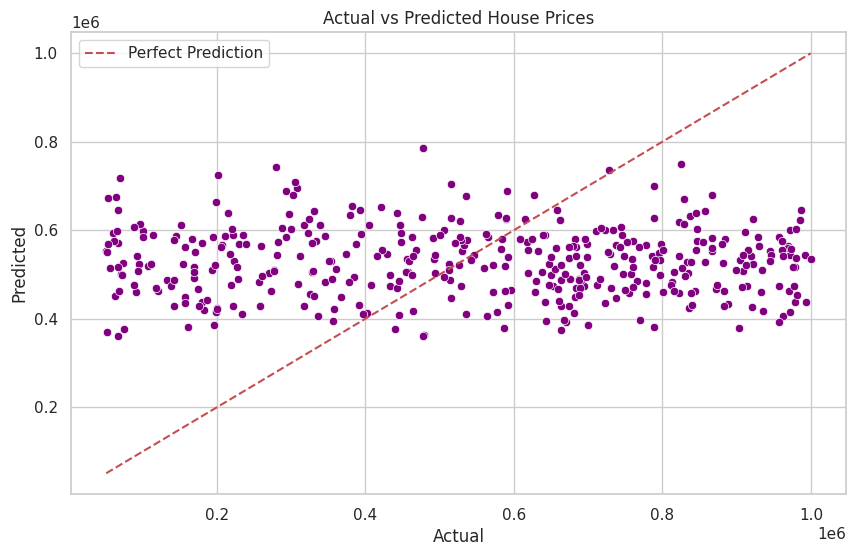

In [ ]:
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
sns.scatterplot(x="Actual", y="Predicted", data=results, color="purple")
plt.plot([results.Actual.min(), results.Actual.max()],
         [results.Actual.min(), results.Actual.max()],
         'r--', label="Perfect Prediction")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()
